# Common Libraries

In [1]:
import os
import sys
import numpy as np
import nibabel as nb
from scipy import stats
from pathlib import Path
import matplotlib.pylab as plt
from scipy.stats import ttest_1samp

# Custom Libraries

In [2]:
sys.path.append(str(Path.cwd().parent))

from surface_data import surf_paths, data_dir_path
from surface_visualization import show_both_hemi_stats
from surface_util import get_bounding_box

# Params

In [3]:
save_dir_path = "/mnt/ext1/seojin/temp"

# Load datas

In [4]:
# Sample datas
l_sample_data_path = os.path.join(data_dir_path, "Sample", "L_sampling_datas.npy")
r_sample_data_path = os.path.join(data_dir_path, "Sample", "R_sampling_datas.npy")

l_sample_datas = np.load(l_sample_data_path)
r_sample_datas = np.load(r_sample_data_path)

# Aggregate datas

In [5]:
l_surf_mean = np.mean(l_sample_datas, axis = 1)
r_surf_mean = np.mean(r_sample_datas, axis = 1)

# Surface map - mean data

save: /mnt/ext1/seojin/temp/L_hemi_stat.png
save: /mnt/ext1/seojin/temp/R_hemi_stat.png
save: /mnt/ext1/seojin/temp/colorbar.png
save: /mnt/ext1/seojin/temp/both_hemi_stat.png


<Figure size 640x480 with 0 Axes>

<Figure size 1000x100 with 0 Axes>

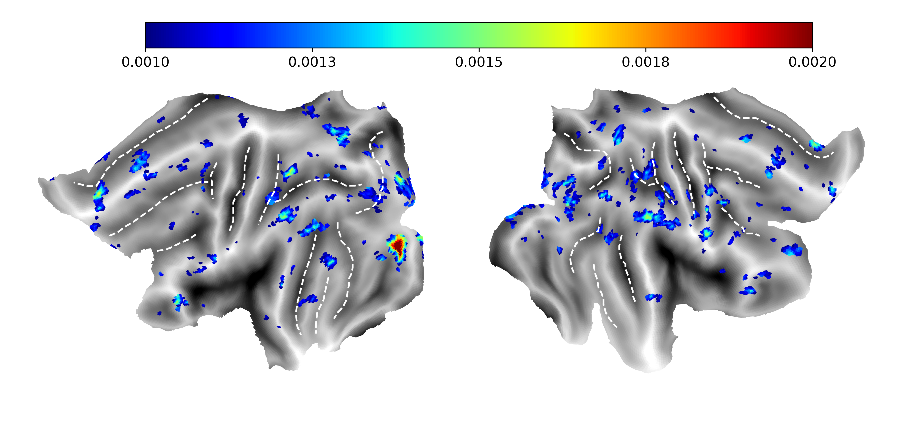

In [6]:
fig, axis = show_both_hemi_stats(l_stat = l_surf_mean,
                                 r_stat = r_surf_mean,
                                 threshold = 0.001,
                                 cscale = (0.001, 0.002),
                                 save_dir_path = save_dir_path,
                                 left_bounding_box = None,
                                 right_bounding_box = None,
                                 is_focusing_bounding_box = False)

# Surface map - statistics

In [7]:
l_t_stat = ttest_1samp(l_sample_datas, axis = 1, popmean = 0)
r_t_stat = ttest_1samp(r_sample_datas, axis = 1, popmean = 0)

In [8]:
_, n_subj = l_sample_datas.shape
df = n_subj - 1

lower_alpha = 0.05
t_crit_lower_bound = stats.t.ppf(1 - lower_alpha/2, df)

upper_alpha = 0.001
t_crit_upper_bound = stats.t.ppf(1 - upper_alpha/2, df)

In [ ]:
fig, axis = show_both_hemi_stats(l_stat = l_t_stat.statistic,
                                 r_stat = r_t_stat.statistic,
                                 threshold = t_crit_lower_bound,
                                 cscale = (t_crit_lower_bound, t_crit_upper_bound),
                                 save_dir_path = save_dir_path,
                                 left_bounding_box = None,
                                 right_bounding_box = None,
                                 is_focusing_bounding_box = False)

save: /mnt/ext1/seojin/temp/L_hemi_stat.png
save: /mnt/ext1/seojin/temp/R_hemi_stat.png
save: /mnt/ext1/seojin/temp/colorbar.png
